
In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Wednesday Jan. 23rd**.  Students must come to class the next day prepared to discuss the material covered in this assignment. 

 

# Pre-Class Assignment: Matrix Mechanics

In this assignment, we will explore the mechanics of vectors and matrices.
These mechanics will be needed in future assignments in this class. 
Make sure you understand and come to class with any questions. 

# Goals for today's pre-class assignment 

</p>

1. Dot Products
1. Matrix Multiply
1. Identity Matrix
1. Vector spaces in $R^n$
1. Assignment Wrap-up

----
# 1. Dot Product Review
Read Section 1.6 if you have questions on "dot product".

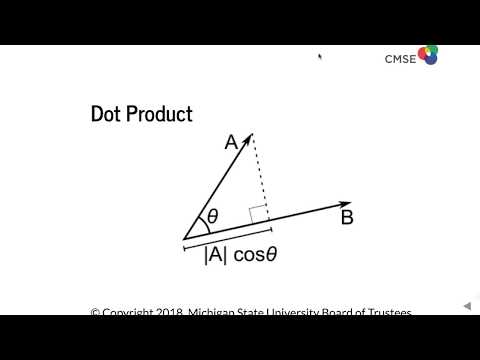

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ZZjWqxKqJwQ",width=640,height=360)

In [2]:
u = [1,2,3]
v = [4,2,1]

In [5]:
dot_uv = 0
for i in range(len(u)):
    dot_uv += u[i]*v[i]
print(dot_uv)

11


In [6]:
import numpy as np

In [7]:
np.dot(u,v)

11

Given two vectors $u$ and $v$ in $R^n$ (i.e. they have the same length), the "dot" product operation multiplies all of the corresponding elements together and then adds them together. Ex:

$$u = [u_1, u_2, \dots, u_n]$$
$$v = [v_1, v_2, \dots, v_n]$$

$$u \cdot v = u_1 v_1 + u_2  v_2 + \dots + u_nv_n$$

or:

$$ u \cdot v = \sum^n_{i=1} u_i v_i$$

This can easily be written as python code as follows:

In [8]:
u = [1,2,3]
v = [3,2,1]
solution = 0
for i in range(len(u)):
    solution += u[i]*v[i]
    
solution

10

In ```Numpy``` the dot product between two vectors can be calculated using the following:

In [9]:
import numpy as np

np.dot([1,2,3], [3,2,1])

10

&#9989; <font color=red>**QUESTION 1:**</font> What is the dot product between u = [ 1, 7, 9, 11] and v = [ 7, 1, 2, 2]?

In [46]:
u = [ 1, 7, 9, 11]
v = [ 7, 1, 2, 2]
np.dot(u,v)

54

&#9989; <font color=red>**QUESTION 2:**</font> What is the dot product of any vector and the zero vector? 

0

&#9989; <font color=red>**QUESTION 3:**</font> What happens to the ```np.dot``` function if the two input vectors are not the same size?  

In [13]:
u = [ 1, 7, 9, 11]
v = [ 7, 1, 2]
np.dot(u,v)
# Get a ValueError

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

----
# 2. Matrix Multiply

Read Section 2.1 of the textbook.

Two matrices $A$ and $B$ can be multiplied together if only if their "inner dimension" is the same, i.e. $A$ is $n\times d$ and $B$ is $d\times m$. 
Multiplication of these two matrices results in a third matrix $C$ with the dimension of $n\times m$.
Note that $C$ has the same first dimension as $A$ and the same second dimension as $B$. i.e $n\times m$.  

The $(i,j)$ element in $C$ is the dot product of the $i$th row of $A$ and the $j$th column of $B$.  

The $i$th row of $A$ is:

$$ [ a_{i1},  a_{i2},  \dots , a_{id} ],$$

and the $j$th column of $B$ is:

$$
\left[
\begin{matrix}
    b_{1j}\\ 
    b_{2j}\\
    \vdots \\
    b_{dj}
\end{matrix}
\right] 
$$

So, the dot product of these two vectors is:

$$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{id}b_{dj}$$

Consider the simple $2\times 2$ example below:


$$ 
\left[
\begin{matrix}
    a & b\\ 
    c & d   
\end{matrix}
\right] 
\left[
\begin{matrix}
    w & x\\ 
    y & z   
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    aw+by & ax+bz\\ 
    cw + dy & cx + dz   
\end{matrix}
\right] 
$$

Let's do an example using ```numpy``` and show the results using ```sympy```:

In [14]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

In [15]:
A = np.matrix([[1,1], [2,2]])
sym.Matrix(A)

⎡1  1⎤
⎢    ⎥
⎣2  2⎦

In [16]:
B = np.matrix([[3,4], [3,4]])
sym.Matrix(B)

⎡3  4⎤
⎢    ⎥
⎣3  4⎦

In [17]:
sym.Matrix(A*B)

⎡6   8 ⎤
⎢      ⎥
⎣12  16⎦

&#9989; <font color=red>**DO THIS:**</font> Given two matrices; $A$ and $B$, show that order matters when doing a matrix multiply. That is, in general, $AB \neq BA$. 
Show this with an example using two $3\times 3$ matrices and ```Numpy```.

In [20]:
# Put your code here.
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
B = np.matrix([[11,12,13],[14,15,16],[17,18,29]])
sym.Matrix(A*B)


⎡90   96   132⎤
⎢             ⎥
⎢216  231  306⎥
⎢             ⎥
⎣342  366  480⎦

In [21]:
sym.Matrix(B*A)

⎡150  186  222⎤
⎢             ⎥
⎢186  231  276⎥
⎢             ⎥
⎣292  356  420⎦

Now consider the following set of linear equations:

$$ 3x_1-3x_2+9x_3 = 24$$
$$ 2x_1-2x_2+7x_3 = 17$$
$$ -x_1+2x_2-4x_3 = -11$$

We typically write this in the following form:

$$ 
\left[
\begin{matrix}
    3 & -3 & 9\\ 
    2 & -2 & 7 \\
    -1 & 2 & -4
\end{matrix}
\right] 
\left[
\begin{matrix}
    x_1 \\ 
    x_2 \\
    x_3
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    24\\ 
    17 \\
    -11
\end{matrix}
\right] 
$$

Notice how doing the matrix multiple results back into the original system of equations. If we rename the three matrices from above to $A$, $x$, and $b$ (note $x$ and $b$ are lowercase because they are column vectors) then we get the main equation for this class. Which is:

$$Ax=b$$

In [22]:
A = np.matrix([[3, -3,9], [2, -2, 7], [-1, 2, -4]])
sym.Matrix(A)

⎡3   -3  9 ⎤
⎢          ⎥
⎢2   -2  7 ⎥
⎢          ⎥
⎣-1  2   -4⎦

In [23]:
b = np.matrix([[24], [17], [-11]])
sym.Matrix(b)

⎡24 ⎤
⎢   ⎥
⎢17 ⎥
⎢   ⎥
⎣-11⎦

In [24]:
#Calculate answer to x using numpy
x = np.linalg.solve(A,b)
sym.Matrix(x)

⎡3.0 ⎤
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣1.0 ⎦

&#9989; <font color=red>**QUESTION 4:**</font> What is the size of the matrix resulting from multiplying a $10 \times 40$ matrix with a $40 \times 3$ matrix?

10 x 3

# 3. Identity Matrix

An identity matrix is a special square matrix (i.e. $n=m$) that has ones in the diagonal and zeros every place else. For example the following is a $3\times 3$ identity matrix:

$$
I_3 = 
\left[
\begin{matrix}
    1 & 0 & 0\\ 
    0 & 1 & 0 \\
    0 & 0 & 1
\end{matrix}
\right] 
$$

We always denote the identity matrix with a capital $I$. Often a subscript is used to denote the value of $n$. The notations $I_{nxn}$ and $I_n$ are both acceptable.

An identity matrix is similar to the number 1 for scalar values.  I.e. multiplying a square matrix $A_{nxn}$ by its corresponding identity matrix $I_{nxn}$ results in itself $A_{nxn}$.

&#9989; <font color=red>**DO THIS:**</font> Pick a random $3\times 3$ matrix and multiply it by the $3\times 3$ Identity matrix and show you get the same answer. 

In [48]:
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
sym.Matrix(A*np.identity(3))

⎡1.0  2.0  3.0⎤
⎢             ⎥
⎢4.0  5.0  6.0⎥
⎢             ⎥
⎣7.0  8.0  9.0⎦

&#9989; <font color=red>**QUESTION 5:**</font> Consider two square matrices $A$ and $B$ of size $n \times n$.  $AB = BA$ is **NOT** true for many $A$ and $B$.  Describe an example where $AB = BA$ is true? Explain why the equality works for your example.

In [30]:
#If the matrix are the same 
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
A*A == A*A
# Or if one of them is a multiple of the identity matrix
B = 3*np.identity(3)
A*B == B*A


matrix([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

&#9989; <font color=red>**QUESTION 6:**</font> The following matrix is symmetric. What are the values for $a$, $b$, and $c$?

$$
\left[
\begin{matrix}
    3 & 5 & a\\ 
    b & 8 & 4 \\
    -3 & c & 3
\end{matrix}
\right] 
$$

Put your answer here:

a = -3

b = 5

c = 4

# 4. Vector spaces in $R^n$
Make sure you have read Sections 1.3, 1.4, and 1.5 of the textbook before answering the following questions.

The following are properties of vector addition and multiplication for vectors $u$ and $v$:

1. $u + v = v + u$ Commutative property
2. $u + (v + w) = (u + v) + w$ Associative property
3. $u+0 = 0 + u = u$ Property of zero vector
4. $u + (-u) = 0$ Property of the negative vector
5. $c(u+v) = cu + cv$ Distributive properties
6. $(c+d)u = cu+du$ Distributive Properties
7. $c(du) = (cd)u$ Distributed Properties
8. $1u = u$ Scalar multiplication by 1

<font color=red>**QUESTION 7:**</font> Compute the following linear combinations for $u = (1,2), v = (4,-1)$, and $w = (-3,5)$. (From Section 1.3 problem 7 of the textbook)

&#9989; <font color=red>**(a)**</font> $u+w$        

In [41]:
u = np.array([1,2])
v = np.array([4,-1])
w = np.array([-3,5])

np.add(u,w)

array([-2,  7])

&#9989; <font color=red>**(b)**</font> $2u+v$        

In [43]:
np.add((2*u),v)

array([6, 3])

&#9989; <font color=red>**(c)**</font> $u+3w$        

In [44]:
np.add(u,3*w)

array([-8, 17])

&#9989; <font color=red>**QUESTION 8:**</font>  (From section 1.4 in the book): A subspace of $R^n$ has all the algebraic properties of $R^n$. The sum of any two vectors in the subspace is also in the subspace.  The multiplication of any two vectors in the subspace is also in the subspace.  Explain in your own words why the zero vector must be included in the subspace.

"The sum of any two vectors in the subspace is also in the subspace", so if you add a vector and the negative of itself, you get the 0 vector, therefore the 0 vector is also in the subspace

&#9989; <font color=red>**QUESTION 9:**</font> (From section 1.5 in the book): A basis is a set of vectors that represent an entire subspace.  What is the standard Bases of $R^4$?

{(1,0,0,0) (0,1,0,0) (0,0,1,0) (0,0,0,1)}

----
# 5. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link](https://docs.google.com/forms/d/e/1FAIpQLSf9clOXB9R_GXSm7ZuI44r_HqjpT9ZUEDgwFSahLK9eug3RTA/viewform?)


In [45]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSf9clOXB9R_GXSm7ZuI44r_HqjpT9ZUEDgwFSahLK9eug3RTA/viewform?embedded=true" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.


&#169; Copyright 2018,  Michigan State University Board of Trustees